# Time Series Analysis

In [1]:
#Stationary Time Series: Mean and Variance of one time matches with Mean and Variance of other time then the series is known as Stationary.

In [58]:
'''
- In Time series there is no dependent or independent variable. 
- The independent variable will also be a dependent variable.
- In Time series, data is very important. Output will always depend on Date.
- Time series is always a univariate.

'''

'\n- In Time series there is not dependent or independent variable. \n- The independent variable will also be a dependent variable.\n- In Time series, data is very important. Output will always depend on Date.\n- Time series is always a univariate.\n\n'

In [59]:
'''
Steps: 
 - Check for Stationary First
     - Look at Plots
     - Summary Statistics
     - Statistical Test - Hypothesis Testing(AD Fuller Test) 
 - Algorithms
     - Moving Average(MA) OR Rolling Statistics
     -

'''

'\nSteps: \n - Check for Stationary First\n     - Look at Plots\n     - Summary Statistics\n     - Statistical Test - Hypothesis Testing(AD Fuller Test) \n - Algorithms\n     - Moving Average(MA) OR Rolling Statistics\n     -\n\n'

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
dataset=pd.read_csv(r"/Users/SyeedSyed/Documents/Learnings/DS_and_ML/DATA/electricity_consumption.csv")

In [62]:
dataset

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.00,247.73,31
1,2/1/2016,292,1138.8,175.20,234.11,31
2,3/1/2016,130,507.0,78.00,123.85,29
3,4/1/2016,117,456.3,70.20,111.22,29
4,5/1/2016,136,530.4,81.60,118.37,29
5,6/1/2016,63,245.7,37.80,77.81,32
6,7/1/2016,110,429.0,66.00,86.67,30
7,8/1/2016,176,686.4,105.60,122.40,29
8,9/1/2016,357,1392.3,214.20,223.62,33
9,10/1/2016,235,916.5,141.00,152.54,29


In [63]:
dataset.shape

(53, 6)

In [64]:
dataset.dtypes

Bill_Date         object
On_peak            int64
Off_peak         float64
Usage_charge     float64
Billed_amount    float64
Billing_days       int64
dtype: object

In [65]:
#YYYY-MM-DD
dataset["Bill_Date"] = pd.to_datetime(dataset["Bill_Date"])

In [66]:
dataset

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.00,247.73,31
1,2016-02-01,292,1138.8,175.20,234.11,31
2,2016-03-01,130,507.0,78.00,123.85,29
3,2016-04-01,117,456.3,70.20,111.22,29
4,2016-05-01,136,530.4,81.60,118.37,29
5,2016-06-01,63,245.7,37.80,77.81,32
6,2016-07-01,110,429.0,66.00,86.67,30
7,2016-08-01,176,686.4,105.60,122.40,29
8,2016-09-01,357,1392.3,214.20,223.62,33
9,2016-10-01,235,916.5,141.00,152.54,29


In [67]:
dataset.dtypes

Bill_Date        datetime64[ns]
On_peak                   int64
Off_peak                float64
Usage_charge            float64
Billed_amount           float64
Billing_days              int64
dtype: object

In [68]:
dataset.set_index("Bill_Date",inplace=True)

In [69]:
dataset

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.00,247.73,31
2016-02-01,292,1138.8,175.20,234.11,31
2016-03-01,130,507.0,78.00,123.85,29
2016-04-01,117,456.3,70.20,111.22,29
2016-05-01,136,530.4,81.60,118.37,29
2016-06-01,63,245.7,37.80,77.81,32
2016-07-01,110,429.0,66.00,86.67,30
2016-08-01,176,686.4,105.60,122.40,29
2016-09-01,357,1392.3,214.20,223.62,33


In [70]:
data = dataset["Billed_amount"]

In [71]:
data

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
2016-06-01     77.81
2016-07-01     86.67
2016-08-01    122.40
2016-09-01    223.62
2016-10-01    152.54
2016-11-01    150.54
2016-12-01    244.37
2017-01-01    263.64
2017-02-01    214.32
2017-03-01    151.54
2017-04-01    118.79
2017-05-01    153.18
2017-06-01    212.08
2017-07-01    281.19
2017-08-01    237.97
2017-09-01    284.30
2017-10-01    172.69
2017-11-01    111.51
2017-12-01    151.42
2018-01-01    267.32
2018-02-01    201.35
2018-03-01    202.91
2018-04-01    150.86
2018-05-01    163.07
2018-06-01    219.76
2018-07-01    283.98
2018-08-01    290.15
2018-09-01    257.96
2018-10-01    327.19
2018-11-01    193.49
2018-12-01    152.34
2019-01-01    196.62
2019-02-01    190.07
2019-03-01    198.57
2019-04-01    115.15
2019-05-01    153.18
2019-06-01    138.53
2019-07-01    238.48
2019-08-01    309.65
2019-09-01    403.89
2019-10-01    244.03
2019-11-01    145.46
201

### Check if Stationary

#### Look at Plots

In [72]:
data.sort_index(inplace=True)

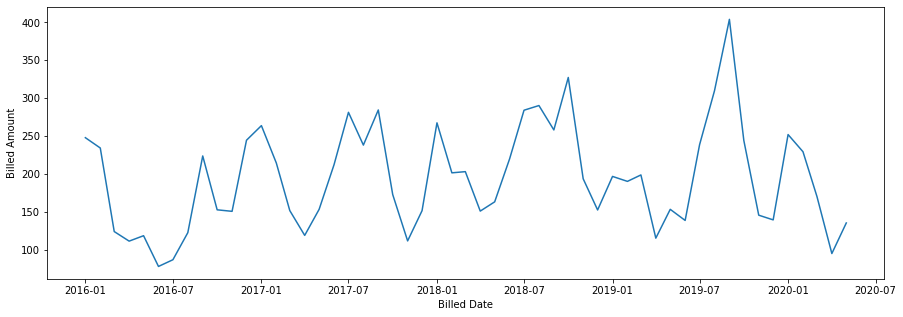

In [73]:
plt.figure(figsize = (15,5))
plt.plot(data)
plt.xlabel("Billed Date")
plt.ylabel("Billed Amount")
plt.show()

#### Summary Statistics

In [74]:
data.head()

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
Name: Billed_amount, dtype: float64

In [75]:
data.head().mean()

167.056

In [76]:
data.tail()

Bill_Date
2020-01-01    251.85
2020-02-01    229.18
2020-03-01    170.16
2020-04-01     94.85
2020-05-01    135.19
Name: Billed_amount, dtype: float64

In [77]:
data.tail().mean()

176.246

In [78]:
data[10:15].mean()

204.88199999999998

In [79]:
data[30:46].mean()

230.83

In [80]:
data.head().var()

4589.81928

In [81]:
data.tail().var()

4216.479130000001

In [82]:
data[10:15].var()

2724.82562

In [83]:
data[35:45].var()

7744.2079511111115

#### Statistical Test - Hypothesis Testing

##### ADFuller Test

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
result = adfuller(data)

In [86]:
# P-Value -- Significance Level or Probability Value
p_cal = result[1]

In [87]:
p_cal

0.0007799874491884334

In [88]:
if(p_cal>0.05):
    print("Series is Not Stationary")
else:
    print("Series is Stationary")

Series is Stationary


### Algorithms

##### Moving Average

In [89]:
'''
 - Moving Average(MA) OR Rolling Statistics
     - Prediction based on Lag or window
     - MA = sum(D)/n
      - n = number of periods in the moving average
      - D = Demand in period

'''

'\n - Moving Average(MA) OR Rolling Statistics\n     - Prediction based on Lag or window\n     - MA = sum(D)/n\n      - n = number of periods in the moving average\n      - D = Demand in period\n\n'

In [90]:
data

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
2016-06-01     77.81
2016-07-01     86.67
2016-08-01    122.40
2016-09-01    223.62
2016-10-01    152.54
2016-11-01    150.54
2016-12-01    244.37
2017-01-01    263.64
2017-02-01    214.32
2017-03-01    151.54
2017-04-01    118.79
2017-05-01    153.18
2017-06-01    212.08
2017-07-01    281.19
2017-08-01    237.97
2017-09-01    284.30
2017-10-01    172.69
2017-11-01    111.51
2017-12-01    151.42
2018-01-01    267.32
2018-02-01    201.35
2018-03-01    202.91
2018-04-01    150.86
2018-05-01    163.07
2018-06-01    219.76
2018-07-01    283.98
2018-08-01    290.15
2018-09-01    257.96
2018-10-01    327.19
2018-11-01    193.49
2018-12-01    152.34
2019-01-01    196.62
2019-02-01    190.07
2019-03-01    198.57
2019-04-01    115.15
2019-05-01    153.18
2019-06-01    138.53
2019-07-01    238.48
2019-08-01    309.65
2019-09-01    403.89
2019-10-01    244.03
2019-11-01    145.46
201

In [91]:
data =pd.DataFrame(data)

In [92]:
data["MA_Data"] = data["Billed_amount"].rolling(window=2).mean().shift(1)

In [93]:
data

,Billed_amount,MA_Data
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,240.920
2016-04-01,111.22,178.980
2016-05-01,118.37,117.535
2016-06-01,77.81,114.795
2016-07-01,86.67,98.090
2016-08-01,122.40,82.240
2016-09-01,223.62,104.535


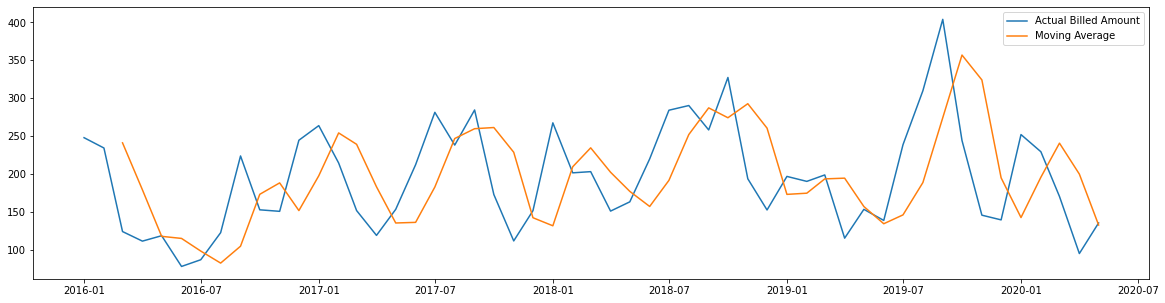

In [94]:
plt.figure(figsize = (20,5))
plt.plot(data["Billed_amount"],label="Actual Billed Amount")
plt.plot(data["MA_Data"],label="Moving Average")
plt.legend()
plt.show()

#### Auto Regression - Algorithm

In [95]:
'''
y = mx+c
xt = m(xt-1)+c
xt+1 = m1(xt) + m2(xt-1) + m3(xt-2) +....+ c + e(error parameter)
e = white noice

'''

'\ny = mx+c\nxt = m(xt-1)+c\nxt+1 = m1(xt) + m2(xt-1) + m3(xt-2) +....+ c + e(error parameter)\ne = white noice\n\n'

In [96]:
statsmodels.__version__

NameError: name 'statsmodels' is not defined

In [97]:
from statsmodels.tsa.ar_model import AutoReg

In [98]:
data = data["Billed_amount"]

In [99]:
data

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
2016-06-01     77.81
2016-07-01     86.67
2016-08-01    122.40
2016-09-01    223.62
2016-10-01    152.54
2016-11-01    150.54
2016-12-01    244.37
2017-01-01    263.64
2017-02-01    214.32
2017-03-01    151.54
2017-04-01    118.79
2017-05-01    153.18
2017-06-01    212.08
2017-07-01    281.19
2017-08-01    237.97
2017-09-01    284.30
2017-10-01    172.69
2017-11-01    111.51
2017-12-01    151.42
2018-01-01    267.32
2018-02-01    201.35
2018-03-01    202.91
2018-04-01    150.86
2018-05-01    163.07
2018-06-01    219.76
2018-07-01    283.98
2018-08-01    290.15
2018-09-01    257.96
2018-10-01    327.19
2018-11-01    193.49
2018-12-01    152.34
2019-01-01    196.62
2019-02-01    190.07
2019-03-01    198.57
2019-04-01    115.15
2019-05-01    153.18
2019-06-01    138.53
2019-07-01    238.48
2019-08-01    309.65
2019-09-01    403.89
2019-10-01    244.03
2019-11-01    145.46
201

In [100]:
data.shape

(53,)

In [101]:
len(data)

53

In [102]:
test_threshold = len(data)-6

In [103]:
test_threshold

47

In [104]:
train = data[:test_threshold]

In [105]:
train.shape

(47,)

In [106]:
test = data[test_threshold:]

In [107]:
test.shape

(6,)

In [108]:
data[(data.index >= "2016-01-01") & (data.index < "2020-01-01")]

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
2016-06-01     77.81
2016-07-01     86.67
2016-08-01    122.40
2016-09-01    223.62
2016-10-01    152.54
2016-11-01    150.54
2016-12-01    244.37
2017-01-01    263.64
2017-02-01    214.32
2017-03-01    151.54
2017-04-01    118.79
2017-05-01    153.18
2017-06-01    212.08
2017-07-01    281.19
2017-08-01    237.97
2017-09-01    284.30
2017-10-01    172.69
2017-11-01    111.51
2017-12-01    151.42
2018-01-01    267.32
2018-02-01    201.35
2018-03-01    202.91
2018-04-01    150.86
2018-05-01    163.07
2018-06-01    219.76
2018-07-01    283.98
2018-08-01    290.15
2018-09-01    257.96
2018-10-01    327.19
2018-11-01    193.49
2018-12-01    152.34
2019-01-01    196.62
2019-02-01    190.07
2019-03-01    198.57
2019-04-01    115.15
2019-05-01    153.18
2019-06-01    138.53
2019-07-01    238.48
2019-08-01    309.65
2019-09-01    403.89
2019-10-01    244.03
2019-11-01    145.46
201

In [109]:
auto_reg_model = AutoReg(train,lags=3)

/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [110]:
# Fit method will return the trained model.
auto_reg_model = auto_reg_model.fit()

In [111]:
#--Trained Model
auto_reg_model

### Prediction

In [112]:
# as window is 3, pass last three values to predict next amount.
pred = auto_reg_model.predict(start=47,end=52)

/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


In [113]:
pred

2019-12-01    115.463743
2020-01-01    141.977773
2020-02-01    183.499630
2020-03-01    212.381142
2020-04-01    219.650615
2020-05-01    211.770188
Freq: MS, dtype: float64

In [114]:
test

Bill_Date
2019-12-01    139.26
2020-01-01    251.85
2020-02-01    229.18
2020-03-01    170.16
2020-04-01     94.85
2020-05-01    135.19
Name: Billed_amount, dtype: float64

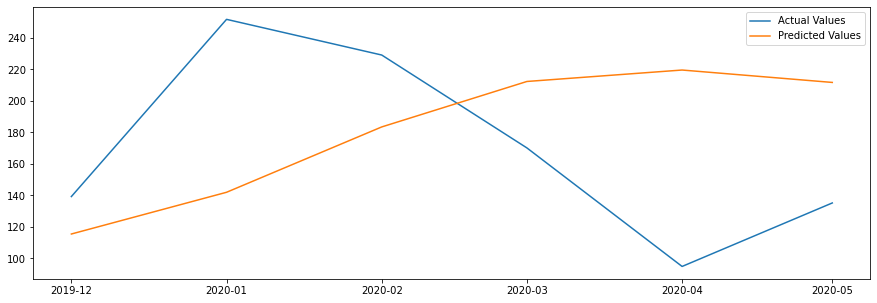

In [115]:
plt.figure(figsize=(15,5))
plt.plot(test,label = "Actual Values")
plt.plot(pred,label = "Predicted Values")
plt.legend()
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
mse= mean_squared_error(test,pred)

In [118]:
mse

6324.534642673117

In [119]:
rmse=np.sqrt(mse)

In [120]:
rmse

79.52694287267126

In [121]:
# Deviation is 79

### Identify the best lag value
1. ACF - Auto Correlation Function - Moving Average
2. PACF - Partial Auto Correlation Function - Auto Regression

#### ACF - Auto Correlation Function

In [122]:
'''
 - Indirect Correlation
 - To calcualte correlation between P1 and P3
  - P1 -> P2
  - P2 -> P3
  
Lagged Time Series : 
 
 
 
'''

'\n - Indirect Correlation\n - To calcualte correlation between P1 and P3\n  - P1 -> P2\n  - P2 -> P3\n  \nLagged Time Series : \n \n \n \n'

#### ACF Plot

In [123]:
from statsmodels.graphics.tsaplots import plot_acf

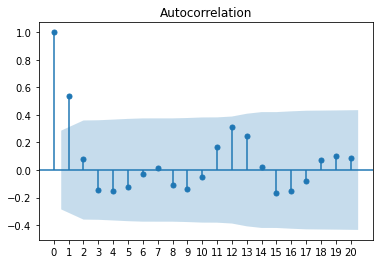

In [124]:
plot_acf(train,lags=20)
plt.xticks(range(0,21))
plt.show()

#### PACF - Partial Auto Correlation Function

In [125]:
'''
Direct Correlation

 - To calcualte correlation between P1 and P3
  - P1 -> P3. 
 - Other factors are not considered.
 
 xt= m1*(x(t-1))+m2*(x(t-2)+m3*(x(t-3)))

'''

'\nDirect Correlation\n\n - To calcualte correlation between P1 and P3\n  - P1 -> P3. \n - Other factors are not considered.\n \n xt= m1*(x(t-1))+m2*(x(t-2)+m3*(x(t-3)))\n\n'

In [126]:
from statsmodels.graphics.tsaplots import plot_pacf

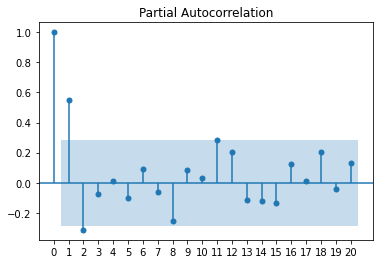

In [127]:
plot_pacf(train,lags=20)
plt.xticks(range(0,21))
plt.show()

### White Noice

In [128]:
'''
Mean = 0 or close to 0 to constant
SD = Consant
Auto Correlation is 0



'''

'\nMean = 0 or close to 0 to constant\nSD = Consant\nAuto Correlation is 0\n\n\n\n'

### ARMA

In [129]:
'''

1.Combination of Auto Regression and Moving Average is called as ARMA

MA = sum(yt-n)/n
AR = xt+1 = m1(xt) + m2(xt-1) + m3(xt-2) +....+ c + e(error parameter)

yt = MA + AR

p = order of lag of moving average
q = Order of auto regression

'''

'\n\n1.Combination of Auto Regression and Moving Average is called as ARMA\n\nMA = sum(yt-n)/n\nAR = xt+1 = m1(xt) + m2(xt-1) + m3(xt-2) +....+ c + e(error parameter)\n\nyt = MA + AR\n\np = order of lag of moving average\nq = Order of auto regression\n\n'

In [130]:
train

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
2016-06-01     77.81
2016-07-01     86.67
2016-08-01    122.40
2016-09-01    223.62
2016-10-01    152.54
2016-11-01    150.54
2016-12-01    244.37
2017-01-01    263.64
2017-02-01    214.32
2017-03-01    151.54
2017-04-01    118.79
2017-05-01    153.18
2017-06-01    212.08
2017-07-01    281.19
2017-08-01    237.97
2017-09-01    284.30
2017-10-01    172.69
2017-11-01    111.51
2017-12-01    151.42
2018-01-01    267.32
2018-02-01    201.35
2018-03-01    202.91
2018-04-01    150.86
2018-05-01    163.07
2018-06-01    219.76
2018-07-01    283.98
2018-08-01    290.15
2018-09-01    257.96
2018-10-01    327.19
2018-11-01    193.49
2018-12-01    152.34
2019-01-01    196.62
2019-02-01    190.07
2019-03-01    198.57
2019-04-01    115.15
2019-05-01    153.18
2019-06-01    138.53
2019-07-01    238.48
2019-08-01    309.65
2019-09-01    403.89
2019-10-01    244.03
2019-11-01    145.46
Nam

In [131]:
test

Bill_Date
2019-12-01    139.26
2020-01-01    251.85
2020-02-01    229.18
2020-03-01    170.16
2020-04-01     94.85
2020-05-01    135.19
Name: Billed_amount, dtype: float64

In [132]:
from statsmodels.tsa.arima_model import ARMA

In [133]:
import statsmodels

In [134]:
statsmodels.__version__

'0.12.2'

In [135]:
#Order or Lags
#Order(p,q)
#p - Auto Regressive Order
#q - Moving Average

arma_model = ARMA(train,order=(1,1))

/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/SyeedSyed/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so 

In [136]:
# fit method will return the trained model
arma_model = arma_model.fit()

In [137]:
train

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
2016-06-01     77.81
2016-07-01     86.67
2016-08-01    122.40
2016-09-01    223.62
2016-10-01    152.54
2016-11-01    150.54
2016-12-01    244.37
2017-01-01    263.64
2017-02-01    214.32
2017-03-01    151.54
2017-04-01    118.79
2017-05-01    153.18
2017-06-01    212.08
2017-07-01    281.19
2017-08-01    237.97
2017-09-01    284.30
2017-10-01    172.69
2017-11-01    111.51
2017-12-01    151.42
2018-01-01    267.32
2018-02-01    201.35
2018-03-01    202.91
2018-04-01    150.86
2018-05-01    163.07
2018-06-01    219.76
2018-07-01    283.98
2018-08-01    290.15
2018-09-01    257.96
2018-10-01    327.19
2018-11-01    193.49
2018-12-01    152.34
2019-01-01    196.62
2019-02-01    190.07
2019-03-01    198.57
2019-04-01    115.15
2019-05-01    153.18
2019-06-01    138.53
2019-07-01    238.48
2019-08-01    309.65
2019-09-01    403.89
2019-10-01    244.03
2019-11-01    145.46
Nam

In [138]:
test

Bill_Date
2019-12-01    139.26
2020-01-01    251.85
2020-02-01    229.18
2020-03-01    170.16
2020-04-01     94.85
2020-05-01    135.19
Name: Billed_amount, dtype: float64

In [146]:
pred= arma_model.predict(start=47,end = 52)

In [147]:
pred

2019-12-01    164.981264
2020-01-01    186.236940
2020-02-01    193.524168
2020-03-01    196.022499
2020-04-01    196.879018
2020-05-01    197.172665
Freq: MS, dtype: float64

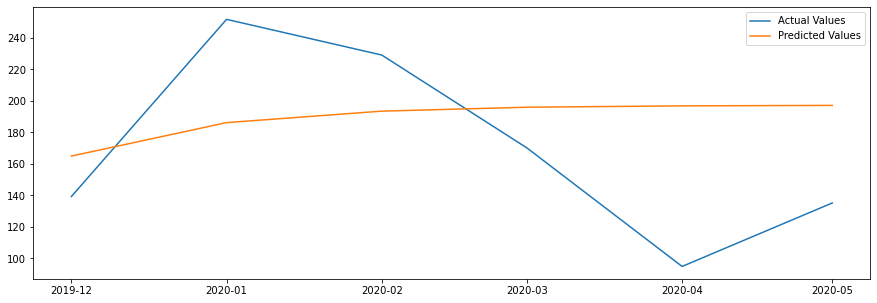

In [150]:
plt.figure(figsize=(15,5))
plt.plot(test,label = "Actual Values")
plt.plot(pred,label = "Predicted Values")
plt.legend()
plt.show()

In [155]:
mse= mean_squared_error(test,pred)

In [156]:
mse

3526.4392691671605

In [157]:
rmse=np.sqrt(mse)

In [158]:
rmse

59.383830031138615